# Introduction: The Iris Flower Dataset

The Iris flower dataset, created by biologist and statistician Ronald Fisher in 1936, is a vital resource in data science. Named after its curator, Edgar Anderson, this dataset contains 150 meticulously collected samples from three Iris flower species: Setosa, Virginica, and Versicolor. It plays a pivotal role in machine learning, serving as a benchmark for classification techniques

# Dataset Attributes:

Containing a total of 150 records, the dataset comprises five crucial attributes. These attributes are petal length, petal width, sepal length, sepal width, and class (species) designation. Each of these attributes plays a pivotal role in unraveling the intricate differentiators that distinguish the Iris species from one another. This dataset serves as an invaluable resource for researchers, data scientists, and enthusiasts seeking to explore the interplay between data, classification techniques, and botanical taxonomy.

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#Loading the data set to pandas dataframe
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Dropping the Id column as they are invalid to our analysis
df=df.drop(columns=["Id"])

In [4]:
#Provides a basic information about the structure and composition of our data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory data analysis

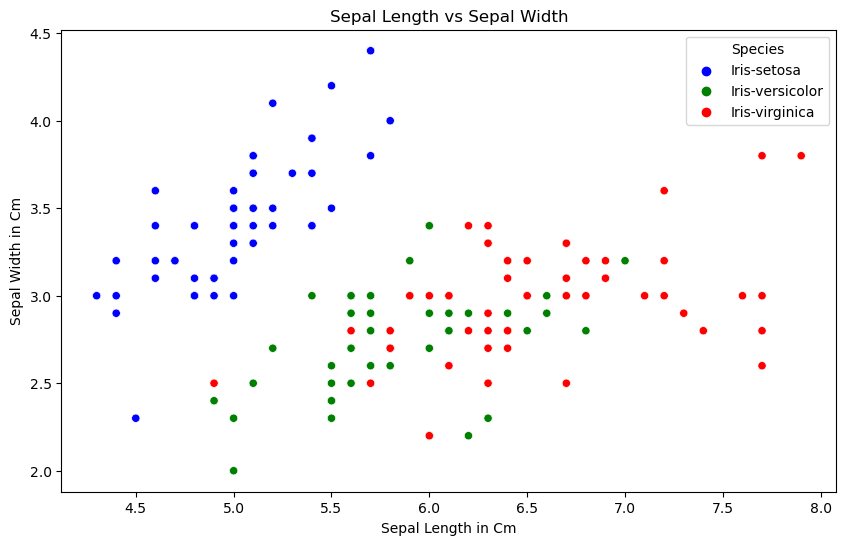

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette=['blue', 'green', 'red'])
plt.xlabel('Sepal Length in Cm')
plt.ylabel('Sepal Width in Cm')
plt.title('Sepal Length vs Sepal Width')
plt.show()

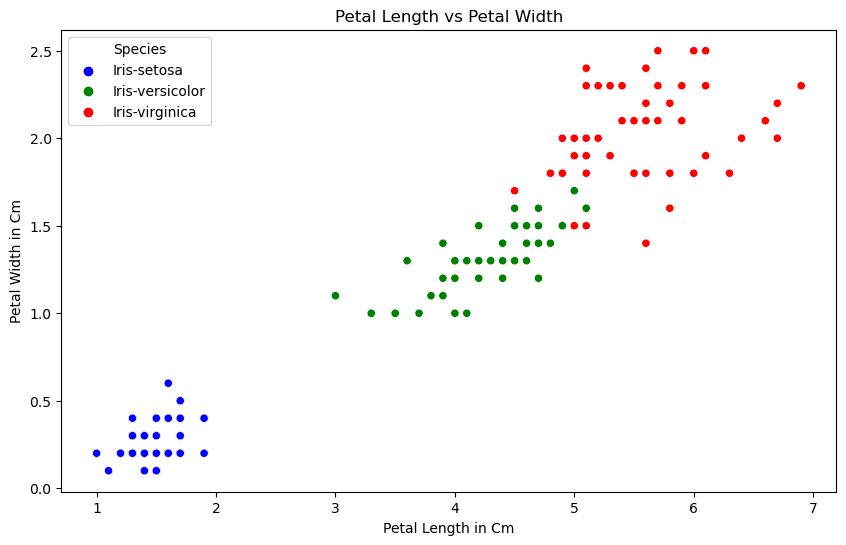

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette=['blue', 'green', 'red'])
plt.xlabel('Petal Length in Cm')
plt.ylabel('Petal Width in Cm')
plt.title('Petal Length vs Petal Width')
plt.show()


### "This illustrates the distribution of lengths and widths for each type, with the petal features providing a more efficient clustering."

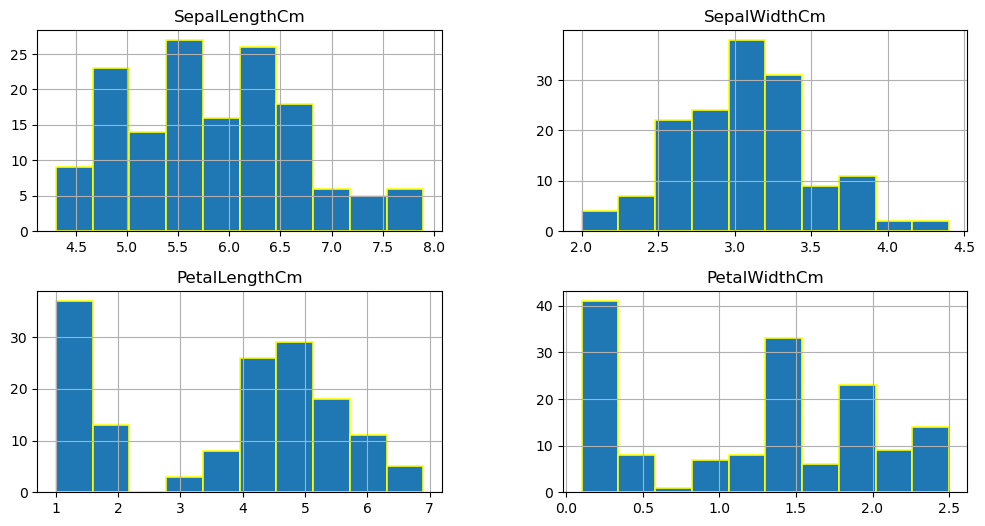

In [11]:
df.hist(edgecolor='yellow',linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

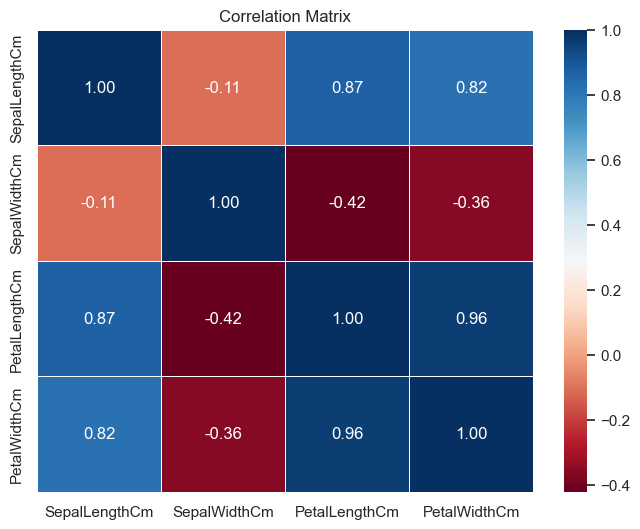

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style and figure size
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Create a heatmap with annotations
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt=".2f", linewidths=0.5)

# Set the title
plt.title("Correlation Matrix")

# Display the plot
plt.show()


In [13]:
#Splitting data set to train and test data
from sklearn.model_selection import train_test_split

x = df.drop(columns=["Species"])
y = df["Species"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [14]:
y_train.head()

118     Iris-virginica
18         Iris-setosa
4          Iris-setosa
45         Iris-setosa
59     Iris-versicolor
Name: Species, dtype: object

In [15]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

modelA = LogisticRegression(max_iter=1000)  # Increase the number of iterations
modelA.fit(x_train,y_train)
print("Fitting completed")
logisticReg_accuracy = modelA.score(x_test,y_test)*100
print("Accuracy using Logistic Regression: ",logisticReg_accuracy)

Fitting completed
Accuracy using Logistic Regression:  97.77777777777777


In [16]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
modelC = DecisionTreeClassifier()
modelC.fit(x_train,y_train)
print("Fitting completed")
Decision_accuracy = modelC.score(x_test,y_test)*100
print("Accuracy using Decision tree model: ",Decision_accuracy)

Fitting completed
Accuracy using Decision tree model:  95.55555555555556


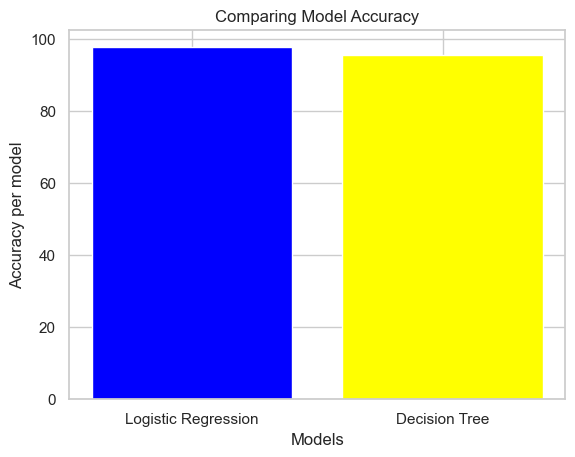

In [18]:
# Model Comparison - Visualization
models = ['Logistic Regression', 'Decision Tree']
accuracies = [logisticReg_accuracy,Decision_accuracy]

plt.bar(models, accuracies, color=['blue', 'yellow', 'red','green'])
plt.xlabel("Models")
plt.ylabel("Accuracy per model")
plt.title("Comparing Model Accuracy")
plt.show()